In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nike-sales-nti15/Nike Dataset.csv


In [2]:
import pandas as pd
from scipy import stats

# Load the dataset
file_path = '/kaggle/input/nike-sales-nti15/Nike Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

# 1. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# 2. Handle missing values
# Fill missing numeric values with the mean and categorical with the mode
data['Price per Unit'] = data['Price per Unit'].fillna(data['Price per Unit'].mean())
data['Total Sales'] = data['Total Sales'].fillna(data['Total Sales'].mean())
data['Units Sold'] = data['Units Sold'].fillna(data['Units Sold'].mean())
data['Region'] = data['Region'].fillna(data['Region'].mode()[0])
data['Retailer'] = data['Retailer'].fillna(data['Retailer'].mode()[0])
data['Sales Method'] = data['Sales Method'].fillna(data['Sales Method'].mode()[0])
data['State'] = data['State'].fillna(data['State'].mode()[0])

# 3. Remove duplicates
data.drop_duplicates(inplace=True)

# 4. Standardize date formats in 'Invoice Date'
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'], errors='coerce')

# 5. Check for any invalid dates that couldn't be parsed
invalid_dates = data[data['Invoice Date'].isnull()]
print("\nInvalid Dates:")
print(invalid_dates)

# 6. Remove rows with invalid dates
data.dropna(subset=['Invoice Date'], inplace=True)

# 7. Check for outliers using z-score
numeric_columns = ['Price per Unit', 'Total Sales', 'Units Sold']
z_scores = stats.zscore(data[numeric_columns])
data = data[(abs(z_scores) < 3).all(axis=1)]  # Remove outliers with z-score greater than 3

# 8. Display cleaned data
print("\nCleaned Data:")
print(data.head())

# Optionally, save the cleaned data to a new CSV file
cleaned_file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {cleaned_file_path}")


Initial Data:
  Invoice Date                    Product     Region     Retailer  \
0   01-01-2020      Men's Street Footwear  Northeast  Foot Locker   
1   02-01-2020    Men's Athletic Footwear  Northeast  Foot Locker   
2   03-01-2020    Women's Street Footwear  Northeast  Foot Locker   
3   04-01-2020  Women's Athletic Footwear  Northeast  Foot Locker   
4   05-01-2020              Men's Apparel  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              50         6000         120  
1     In-store  New York              50         5000         100  
2     In-store  New York              40         4000         100  
3     In-store  New York              45         3825          85  
4     In-store  New York              60         5400          90  

Missing Values:
Invoice Date      0
Product           0
Region            0
Retailer          0
Sales Method      0
State             0
Price per Unit    0
Total 

Cleaned Data:
  Invoice Date                    Product     Region     Retailer  \
0   2020-04-01  Women's Athletic Footwear  Northeast  Foot Locker   
1   2020-08-01    Men's Athletic Footwear  Northeast  Foot Locker   
2   2020-01-02    Men's Athletic Footwear  Northeast  Foot Locker   
3   2020-02-02    Women's Street Footwear  Northeast  Foot Locker   
4   2020-03-02  Women's Athletic Footwear  Northeast  Foot Locker   

  Sales Method     State  Price per Unit  Total Sales  Units Sold  
0     In-store  New York              45         3825          85  
1       Outlet  New York              50         4500          90  
2       Outlet  New York              50         4500          90  
3       Outlet  New York              40         3600          90  
4       Outlet  New York              45         3713          83  

Training Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report (Training Set):
              precision    recall  f1-scor

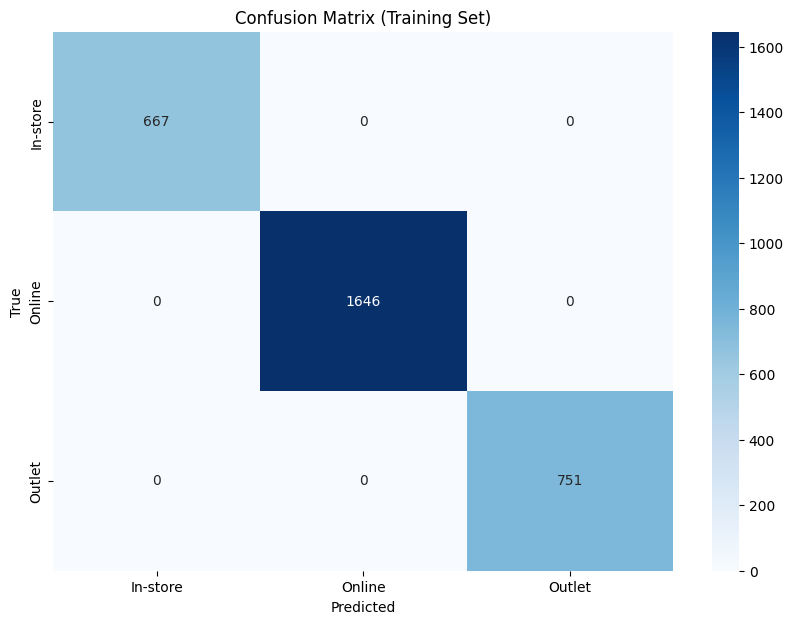

In [3]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the cleaned dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Cleaned Data:")
print(data.head())

# Define features (X) and target (y)
# Using 'Sales Method' as target, others as features
X = data.drop(columns=['Sales Method'])  # Exclude target variable
y = data['Sales Method']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 2: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Code
# Train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate model performance on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

print("\nTraining Performance:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

# Generate a classification report for the training set
class_report_train = classification_report(y_train, y_train_pred, target_names=model.classes_)
print("\nClassification Report (Training Set):")
print(class_report_train)

# Visualize the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Testing Performance:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Classification Report (Testing Set):
              precision    recall  f1-score   support

    In-store       0.98      0.98      0.98       173
      Online       0.90      0.91      0.90       377
      Outlet       0.82      0.81      0.81       217

    accuracy                           0.89       767
   macro avg       0.90      0.90      0.90       767
weighted avg       0.89      0.89      0.89       767



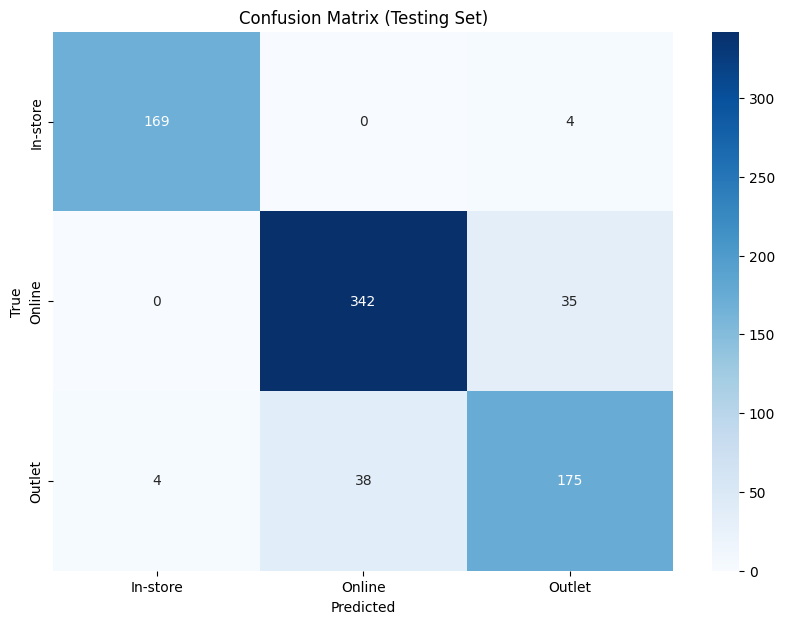

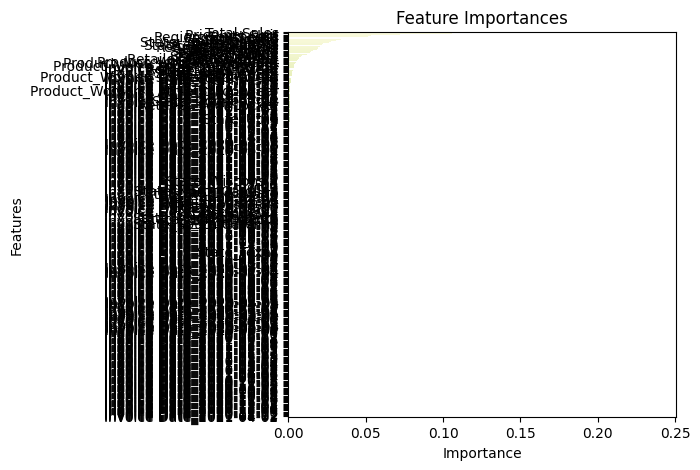

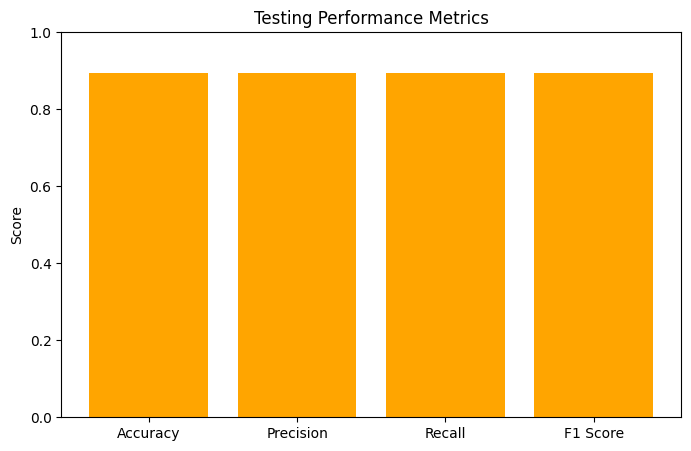

In [4]:
# Testing Code
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance on the testing set
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')

print("\nTesting Performance:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

# Generate a classification report for the testing set
class_report_test = classification_report(y_test, y_pred, target_names=model.classes_)
print("\nClassification Report (Testing Set):")
print(class_report_test)

# Visualize the confusion matrix for the testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize feature importances as a bar chart
importances = model.feature_importances_
feature_importances_df = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 5))
sns.barplot(x=feature_importances_df['Importance'], y=feature_importances_df.index, palette='YlGnBu')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Visualize performance metrics using a bar chart for testing performance
metrics = {
    'Accuracy': accuracy_test,
    'Precision': precision_test,
    'Recall': recall_test,
    'F1 Score': f1_test
}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color='orange')
plt.title('Testing Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [5]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Load the cleaned dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Encode categorical variables for association rule mining
categorical_cols = ['Product', 'Region', 'Retailer', 'Sales Method', 'State']
data_encoded = pd.get_dummies(data[categorical_cols]).astype(bool)

# Apply the Apriori algorithm to find frequent itemsets (minimum support 0.05)
frequent_itemsets = apriori(data_encoded, min_support=0.05, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                                           itemsets
0   0.168624                            (Product_Men's Apparel)
1   0.167058                  (Product_Men's Athletic Footwear)
2   0.160010                    (Product_Men's Street Footwear)
3   0.164187                          (Product_Women's Apparel)
4   0.170452                (Product_Women's Athletic Footwear)
5   0.169668                  (Product_Women's Street Footwear)
6   0.297311                                   (Region_Midwest)
7   0.285826                                 (Region_Northeast)
8   0.090838                                     (Region_South)
9   0.101018                                 (Region_Southeast)
10  0.225007                                      (Region_West)
11  0.089011                                  (Retailer_Amazon)
12  0.264683                             (Retailer_Foot Locker)
13  0.113025                                  (Retailer_Kohl's)
14  0.237797         

Association Rules:
                              antecedents               consequents  \
0                        (Region_Midwest)     (Sales Method_Online)   
1                       (Retailer_Amazon)        (Region_Northeast)   
2                     (State_Connecticut)        (Region_Northeast)   
3                        (State_New York)        (Region_Northeast)   
4                          (Region_South)  (Retailer_Sports Direct)   
5                          (Region_South)     (Sales Method_Outlet)   
6                      (Region_Southeast)     (Sales Method_Online)   
7                           (Region_West)      (Retailer_West Gear)   
8  (Region_Midwest, Retailer_Foot Locker)     (Sales Method_Online)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.297311            0.528061  0.193944    0.652327  1.235325   
1            0.089011            0.285826  0.054816    0.615836  2.154582   
2            0.056382            0.2858

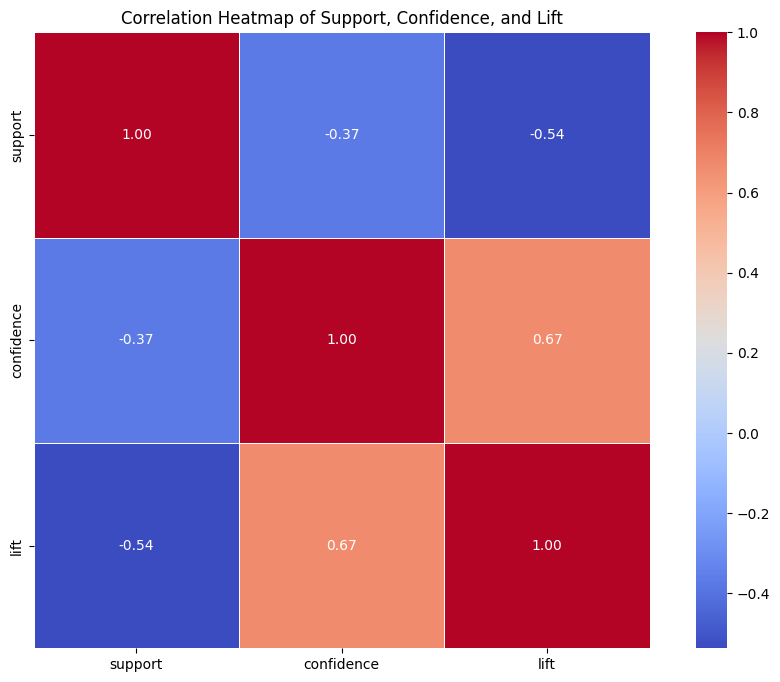

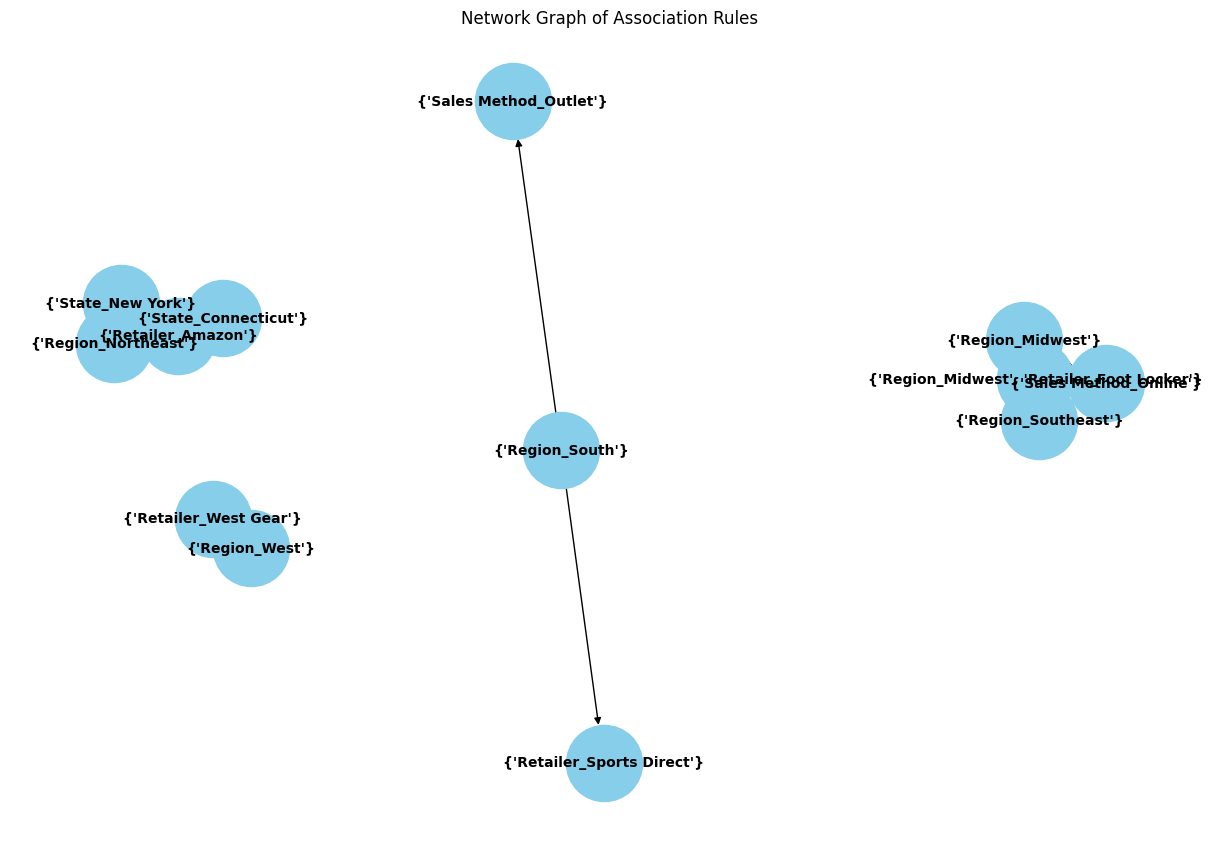

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


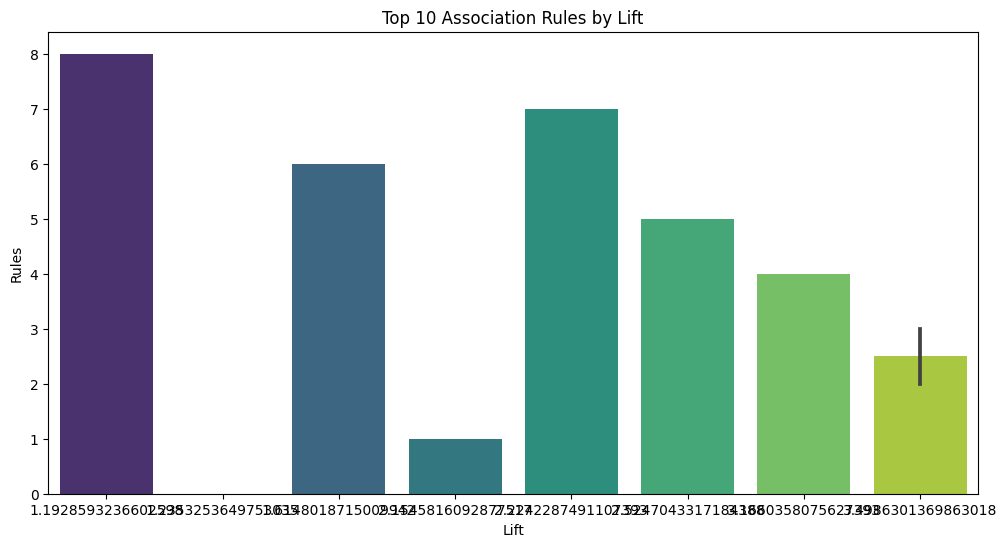

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Association Rules:")
print(rules)

# Visualize association rules metrics
# Correlation Heatmap of Support, Confidence, and Lift
plt.figure(figsize=(12, 8))
heatmap_data = rules[['support', 'confidence', 'lift']]
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Support, Confidence, and Lift')
plt.show()

# Network Graph of Rules
G = nx.DiGraph()
for _, row in rules.iterrows():
    G.add_edge(f"{set(row['antecedents'])}", f"{set(row['consequents'])}", weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Network Graph of Association Rules')
plt.show()

# Bar Plot of Top Rules by Lift
top_n = 10  # Change this to the number of top rules you want to display
top_rules = rules.nlargest(top_n, 'lift')

plt.figure(figsize=(12, 6))
sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette='viridis')
plt.title(f'Top {top_n} Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()



Processing data for the Northeast region:

Most Purchased Categories by 'Online' in the Northeast Region:
                     Product Sales Method  Units Sold
2      Men's Street Footwear       Online        1226
3            Women's Apparel       Online         801
1    Men's Athletic Footwear       Online         796
5    Women's Street Footwear       Online         709
0              Men's Apparel       Online         583
4  Women's Athletic Footwear       Online         549

Most Used Retailers for 'Men's Street Footwear' by 'Online' in the Northeast Region:
        Retailer  Units Sold
1    Foot Locker         363
5      West Gear         279
3  Sports Direct         197
0         Amazon         186
2         Kohl's         170
4        Walmart          31


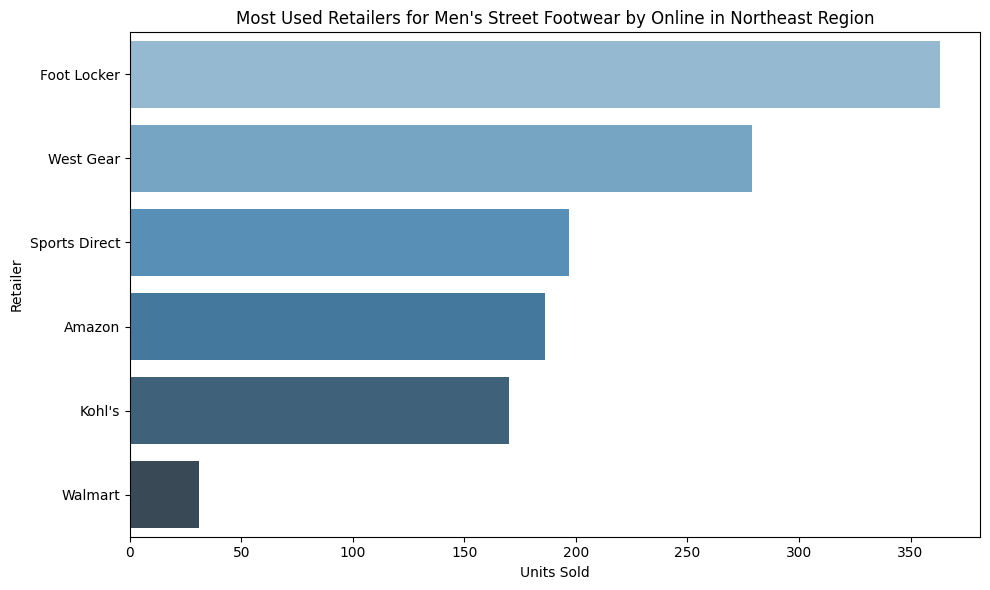


Processing data for the South region:

Most Purchased Categories by 'Outlet' in the South Region:
                     Product Sales Method  Units Sold
1    Men's Athletic Footwear       Outlet        1823
2      Men's Street Footwear       Outlet        1814
3            Women's Apparel       Outlet        1588
5    Women's Street Footwear       Outlet        1477
4  Women's Athletic Footwear       Outlet        1291
0              Men's Apparel       Outlet        1072

Most Used Retailers for 'Men's Athletic Footwear' by 'Outlet' in the South Region:
        Retailer  Units Sold
1  Sports Direct        1465
2        Walmart         216
3      West Gear         103
0    Foot Locker          39


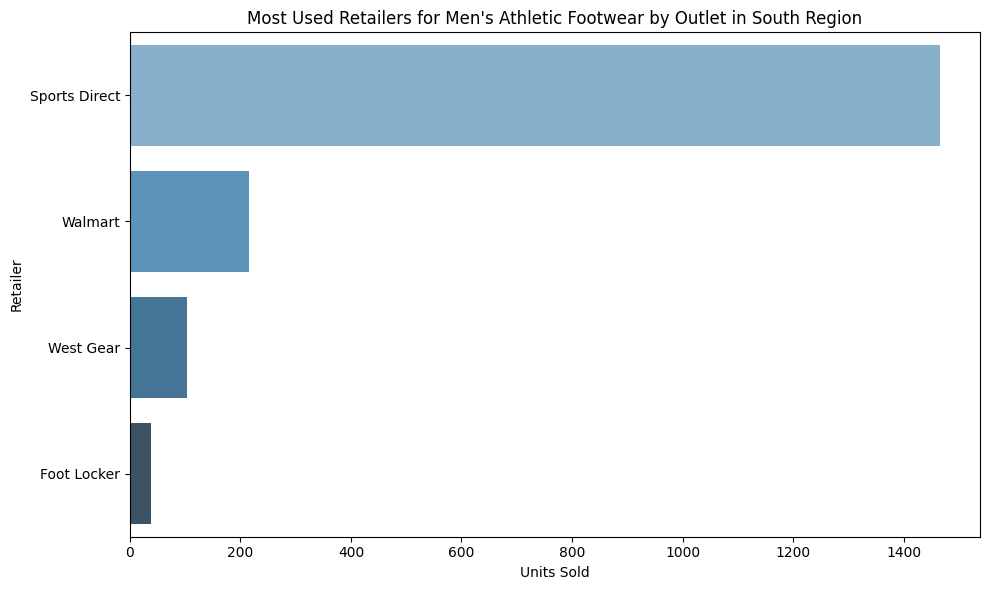


Processing data for the West region:

Most Purchased Categories by 'Online' in the West Region:
                     Product Sales Method  Units Sold
2      Men's Street Footwear       Online        1759
1    Men's Athletic Footwear       Online        1592
3            Women's Apparel       Online        1575
5    Women's Street Footwear       Online        1462
4  Women's Athletic Footwear       Online        1205
0              Men's Apparel       Online        1088

Most Used Retailers for 'Men's Street Footwear' by 'Online' in the West Region:
        Retailer  Units Sold
3      West Gear         909
0    Foot Locker         303
1         Kohl's         300
2  Sports Direct         247


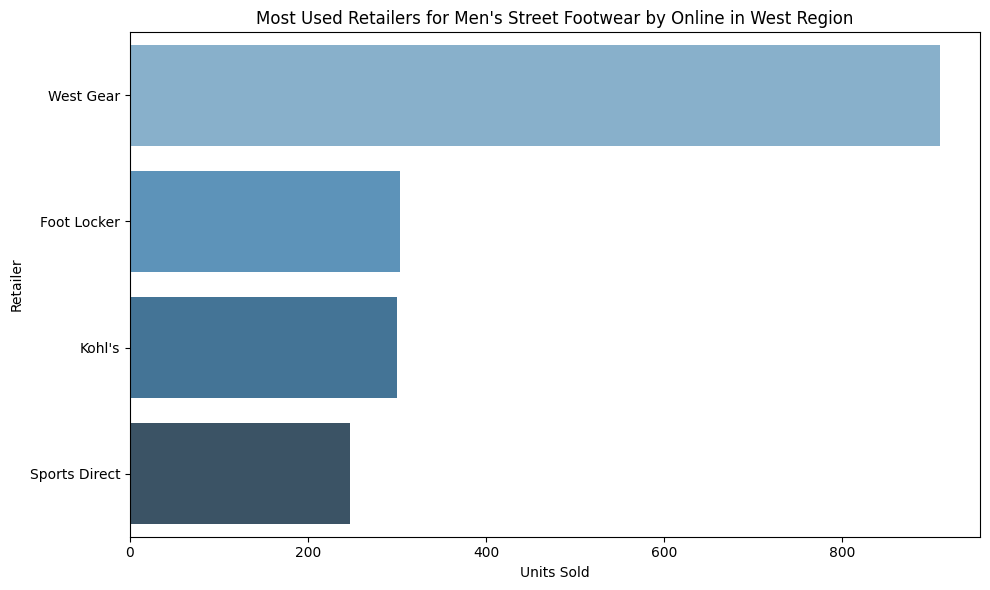


Processing data for the Midwest region:

Most Purchased Categories by 'Online' in the Midwest Region:
                     Product Sales Method  Units Sold
2      Men's Street Footwear       Online        2951
3            Women's Apparel       Online        2073
1    Men's Athletic Footwear       Online        1877
5    Women's Street Footwear       Online        1654
0              Men's Apparel       Online        1404
4  Women's Athletic Footwear       Online        1328

Most Used Retailers for 'Men's Street Footwear' by 'Online' in the Midwest Region:
        Retailer  Units Sold
1    Foot Locker         903
0         Amazon         750
3  Sports Direct         504
4      West Gear         402
2         Kohl's         392


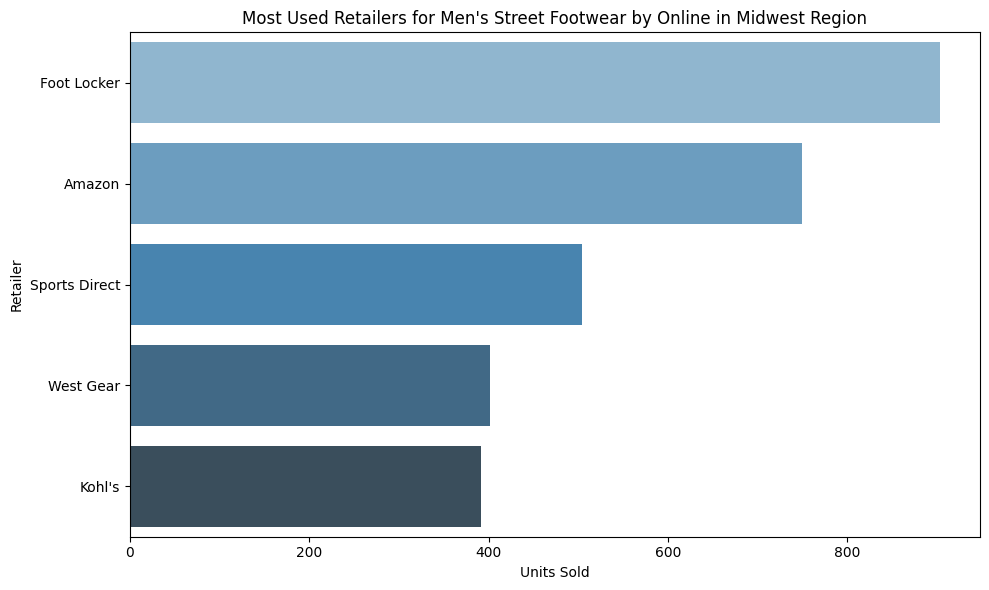


Processing data for the Southeast region:

Most Purchased Categories by 'Online' in the Southeast Region:
                     Product Sales Method  Units Sold
5    Women's Street Footwear       Online        2518
1    Men's Athletic Footwear       Online        2352
4  Women's Athletic Footwear       Online        2203
0              Men's Apparel       Online        2180
2      Men's Street Footwear       Online        1958
3            Women's Apparel       Online        1923

Most Used Retailers for 'Women's Street Footwear' by 'Online' in the Southeast Region:
        Retailer  Units Sold
2  Sports Direct        1176
1    Foot Locker        1123
0         Amazon         164
3      West Gear          55


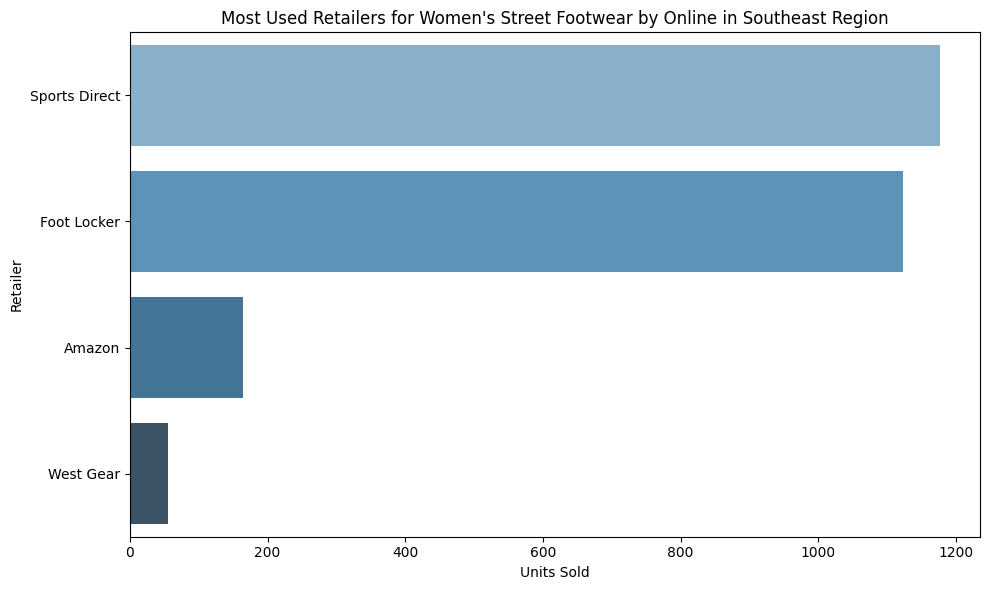

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load the dataset (replace with actual path)
data = pd.read_csv("/kaggle/working/Nike_Cleaned_Dataset.csv")

# Step 1: Get a list of unique regions from the dataset
regions = data['Region'].unique()

# Set up the color palette for the graph
sns.set_palette("muted")

# Loop through each region to process the data
for region in regions:
    print(f"\nProcessing data for the {region} region:")
    
    # Filter the data for the current region
    region_data = data[data['Region'] == region]

    # Step 2: Find which sales method is more popular in the region
    sales_method_counts = region_data['Sales Method'].value_counts()

    # Step 3: Identify the most popular sales method in the region
    popular_method = sales_method_counts.idxmax()  # Find the most used method (Online or In-store)
    
    # Filter data to focus on the most popular sales method in the current region
    popular_method_data = region_data[region_data['Sales Method'] == popular_method]

    # Step 4: Find the most purchased product category using the popular sales method
    category_sales_method = popular_method_data.groupby(['Product', 'Sales Method'])['Units Sold'].sum().reset_index()
    
    # Sort the categories based on units sold in descending order
    category_sales_method_sorted = category_sales_method.sort_values(by='Units Sold', ascending=False)
    
    # Get the most popular product category (first row after sorting)
    most_popular_product = category_sales_method_sorted.iloc[0]['Product']
    
    # Filter the data for the most popular product category
    popular_product_data = popular_method_data[popular_method_data['Product'] == most_popular_product]

    # Step 5: Find the most used retailers for the most popular product in this region and sales method
    retailer_sales = popular_product_data.groupby(['Retailer'])['Units Sold'].sum().reset_index()

    # Sort the retailers based on units sold in descending order
    retailer_sales_sorted = retailer_sales.sort_values(by='Units Sold', ascending=False)

    # Display the results
    print(f"\nMost Purchased Categories by '{popular_method}' in the {region} Region:")
    print(category_sales_method_sorted)
    print(f"\nMost Used Retailers for '{most_popular_product}' by '{popular_method}' in the {region} Region:")
    print(retailer_sales_sorted)

    # Plotting the results for the most used retailers for the most popular product
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Units Sold', y='Retailer', data=retailer_sales_sorted, palette="Blues_d")
    plt.title(f'Most Used Retailers for {most_popular_product} by {popular_method} in {region} Region')
    plt.xlabel('Units Sold')
    plt.ylabel('Retailer')
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
from sklearn.model_selection import train_test_split

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset:")
print(data.head())

# Step 1: Data Preprocessing
# Selecting only numerical columns for clustering
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data for K-means
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Step 2: Split the data into training and testing sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Step 3: Apply the K-means algorithm on training data
# Choosing the number of clusters (k) using the elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow plot, select the optimal number of clusters
optimal_k = 3  # Update this based on your elbow plot result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Train on training data
X_train_clusters = kmeans.fit_predict(X_train)

# Step 4: Evaluate the clustering performance using Silhouette Score on training data
silhouette_train = silhouette_score(X_train, X_train_clusters)
print(f"\nSilhouette Score (Training Data): {silhouette_train:.2f}")

# Step 5: Visualize the Clusters (Training Data)
# 5.1: Bar chart of data points per cluster in the training set
plt.figure(figsize=(8, 5))
sns.countplot(x=X_train_clusters, palette='viridis')
plt.title('Number of Data Points in Each Cluster (Training Data)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# 5.2: Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
data_train_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
data_train_pca['Cluster'] = X_train_clusters

# Plot the clusters for the training data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_train_pca, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA-reduced - Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCentroids of each cluster (Training Data):")
print(pd.DataFrame(centroids, columns=numerical_data.columns))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset (assuming it's the same cleaned dataset)
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset:")
print(data.head())

# Step 1: Data Preprocessing
# Selecting only numerical columns for clustering
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data for K-means (using the same scaler from training)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Step 2: Apply the K-means algorithm on testing data (using the model trained in the training phase)
optimal_k = 3  # Ensure this matches the number selected during training

# Initialize and fit the K-means model with the training data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)  # This is important to train the model

# Apply the K-means model to the testing data (after fitting)
X_test_clusters = kmeans.predict(data_scaled)

# Step 3: Evaluate the clustering performance using Silhouette Score on testing data
silhouette_test = silhouette_score(data_scaled, X_test_clusters)
print(f"\nSilhouette Score (Testing Data): {silhouette_test:.2f}")

# Step 4: Visualize the Clusters (Testing Data)
# 4.1: Bar chart of data points per cluster in the testing set
plt.figure(figsize=(8, 5))
sns.countplot(x=X_test_clusters, palette='viridis')
plt.title('Number of Data Points in Each Cluster (Testing Data)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# 4.2: Apply PCA to reduce dimensions to 2 for visualization (Testing Data)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(data_scaled)
data_test_pca = pd.DataFrame(X_test_pca, columns=['PCA1', 'PCA2'])
data_test_pca['Cluster'] = X_test_clusters

# Plot the clusters for the testing data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_test_pca, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-means Clustering with {optimal_k} Clusters (PCA-reduced - Testing Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the centroids (same as the training phase for consistency)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCentroids of each cluster (Testing Data):")
print(pd.DataFrame(centroids, columns=numerical_data.columns))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Create a binary target for high and low sales based on a threshold
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Save the model, scaler, and label encoder for later use
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Training completed and model saved.")


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model, scaler, and label encoder
scaler = joblib.load('scaler.pkl')
svm_model = joblib.load('svm_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Load the dataset (again, as we only saved the model and scaler)
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
y = label_encoder.transform(y)

# Standardize the features using the previously fitted scaler
X_scaled = scaler.transform(X)

# Split the data into training and test sets (using the same split as during training)
# Alternatively, you can directly use the test data from the original split above.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Predict on the test set
y_pred = svm_model.predict(X_test)

# Step 3: Evaluate the Model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a bar chart for evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: add a horizontal line at 0.5 for reference
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model and its parameters
best_dt_model = random_search.best_estimator_
print(f"Best Hyperparameters: {random_search.best_params_}")

# Make predictions with the best model
y_train_pred = best_dt_model.predict(X_train)
y_pred = best_dt_model.predict(X_test)

# Evaluate the model performance on training set
print("\nTraining Performance (Best Model):")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred, average='weighted'):.2f}")

# Generate classification report and confusion matrix for training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

# Visualize confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt_model.classes_, yticklabels=best_dt_model.classes_)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluate the model performance on testing set
print("\nTesting Performance (Best Model):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

# Generate classification report and confusion matrix for testing set
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix for testing set
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=best_dt_model.classes_, yticklabels=best_dt_model.classes_)
plt.title('Confusion Matrix (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize feature importances of the best model
importances = best_dt_model.feature_importances_
feature_importances_df = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(5, 5))
sns.barplot(x=feature_importances_df['Importance'], y=feature_importances_df.index, palette='YlGnBu')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import joblib
import warnings
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Create a binary target for high and low sales based on a threshold
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf'
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (if using polynomial kernel)
    'class_weight': [None, 'balanced'],  # Class weights
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the model with the best hyperparameters found
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Save the optimized model, scaler, and label encoder for later use
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(best_model, 'svm_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Optimization completed and model saved.")
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Step 3: Model Evaluation
y_pred = best_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a bar chart for evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: add a horizontal line at 0.5 for reference
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/kaggle/working/Nike_Cleaned_Dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# Create a binary target for high and low sales based on a threshold
sales_threshold = data['Total Sales'].median()  # Use median as a cutoff point
data['Sales_Category'] = ['High' if x > sales_threshold else 'Low' for x in data['Total Sales']]

# Select features and target variable
features = ['Price per Unit', 'Total Sales', 'Units Sold']
X = data[features]
y = data['Sales_Category']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 2: Bagging with DecisionTreeClassifier
# Initialize the base classifier (DecisionTreeClassifier)
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=dt_model, n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
bagging_model.fit(X_train, y_train)

# Step 3: Model Evaluation
y_pred = bagging_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Create a bar chart for evaluation metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.axhline(y=0.5, color='r', linestyle='--')  # Optional: add a horizontal line at 0.5 for reference
plt.show()
